## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read RegData csv file

##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
#read the csv data file
data = pd.read_csv("RegData.csv", header=None)
print(data)

      0    1
0   2.9  4.0
1   6.7  7.4
2   4.9  5.0
3   7.9  7.2
4   9.8  7.9
5   6.9  6.1
6   6.1  6.0
7   6.2  5.8
8   6.0  5.2
9   5.1  4.2
10  4.7  4.0
11  4.4  4.4
12  5.8  5.2


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [3]:
# extract columns of input from the dataframe
x = data[0]
x = np.array(x)  # change x to numpy array
print("X :\n",x)
print("-----------------------------------")

# extract columns of output from the dataframe
y = data[1]
y = np.array(y)   # change y to numpy array
print("Y :\n",y)

X :
 [2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]
-----------------------------------
Y :
 [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


## Plot the original data (scatter plot X, Y)

Text(0.5, 1.0, 'Data points')

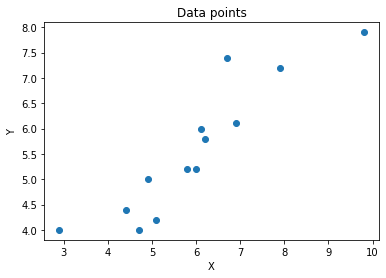

In [4]:
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data points")

# LR Full Implementation

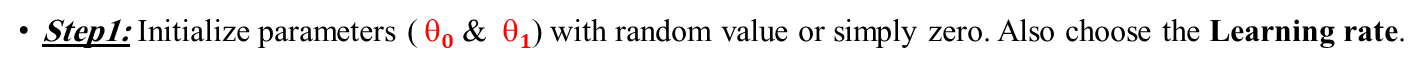

In [5]:
# intialize theta_0 , theta_1
theta_0 = 0
theta_1 = 0

# intialize Learning rate
Learning_rate = 0.001

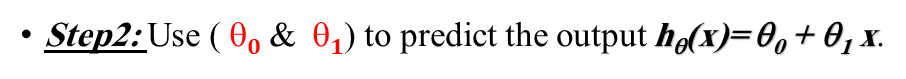


In [6]:
# build Hypothesis function
def model_fun(theta_0, theta_1, x):
    predict = theta_0 + theta_1 * x
    return predict

In [7]:
predict = model_fun(theta_0, theta_1, x)
#predict

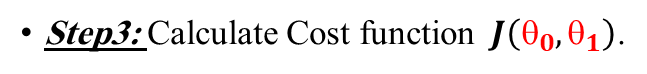
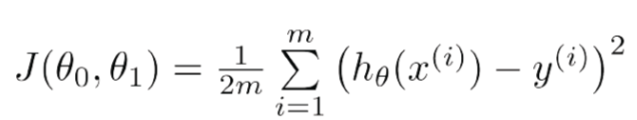

In [8]:
# build Cost function
def cost_fun(predict_Y):
    # initialize m
    m = data.shape[0]

    # calculate error (difference between predict output and target output) 
    error = predict_Y - y

    # Calc. cost function (Loss fun.)
    J = (1/(2*m)) * (np.dot(error,error))
    # Another ways to calc. cost
    #J = (1/(2*m)) * sum(error*error)
    #J = (1/(2*m)) * sum(error**2)
    
    return error , J

In [9]:
error, J= cost_fun(predict)

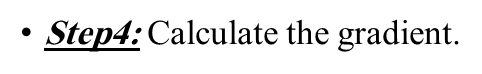
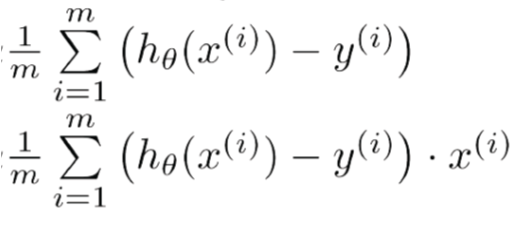

In [10]:
# function to calculat parameters gerdient
def Gradient(error):
    # initialize m
    m = data.shape[0]
    
    # Calc. Gredient for the parameters
    gred_theta0 = (1/m) * sum(error)
    gred_theta1 = (1/m) * np.dot(error,x)

    return gred_theta0, gred_theta1

In [11]:
gred_theta0, gred_theta1 = Gradient(error)
#print(gred_theta0)
#print(gred_theta1)

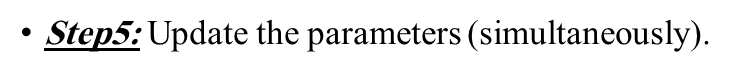
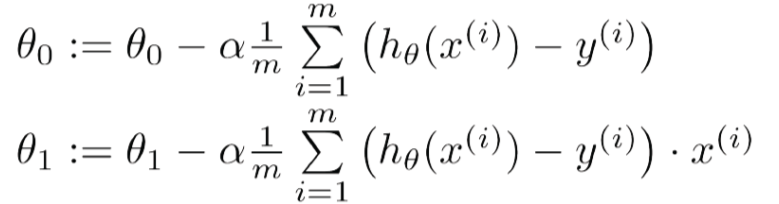

In [12]:
# Update Function
def update(theta_0, gred_theta0, theta_1, gred_theta1, Learning_rate):  
    # Update Parameters
    theta_0 = theta_0 - (Learning_rate * gred_theta0)
    theta_1 = theta_1 - (Learning_rate * gred_theta1)
    
    # return updated parameters
    return theta_0, theta_1

In [13]:
theta_0, theta_1 =update(theta_0, gred_theta0, theta_1, gred_theta1, Learning_rate)
#print(theta_0)
#print(theta_1)

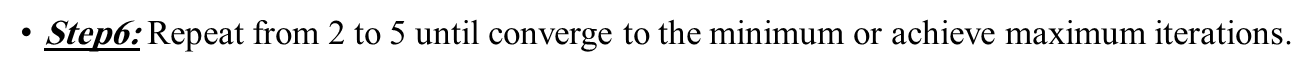

In [14]:
# Intialization
theta_0 = 0
theta_1 = 0
Learning_rate = 0.01
num_iterations = 100
thresold = 0.001
THETA_0 =[]
THETA_1 =[]
Cost_J = []

counter = 0   # to count number of iteration will model take 


# for loop about iteration
for i in range(num_iterations):
    # call all previous created functions Aboove
    predict = model_fun(theta_0, theta_1, x) # Calac h(x)
    
    error,J = cost_fun(predict)  
    Cost_J.append(J) # add each Cost value of each iteration in the list
    
    gred_theta0, gred_theta1 = Gradient(error)
    # Calc. new thetas
    theta_0, theta_1 =update(theta_0, gred_theta0, theta_1, gred_theta1, Learning_rate)
    THETA_0.append(theta_0)
    THETA_1.append(theta_1)
    
    counter += 1 # incerement it in each iteration 
    
    # check for early stoping
    if abs(Cost_J[i-1] - Cost_J[i]) < thresold and i > 1: # start from i > 1 check because before this we don't have past value  
        break
    
    print("Cost :",J,"  Theta_0 :",theta_0,"  Theta_1 :",theta_1)
    

print("\n***************************************************************************************\n")
print("Model Will take",counter,"iterations to Converge")

Cost : 16.305384479692314   Theta_0 : 0.05569230739769232   Theta_1 : 0.3504384604321539
Cost : 6.175608808043301   Theta_0 : 0.08996312489803085   Theta_1 : 0.5638229867322323
Cost : 2.417830065479563   Theta_0 : 0.1111866477959166   Theta_1 : 0.6937329799990052
Cost : 1.0237981049450082   Theta_0 : 0.12446329431785443   Theta_1 : 0.7728017064776693
Cost : 0.5066182835290437   Theta_0 : 0.13289954403851054   Theta_1 : 0.8209049028027976
Cost : 0.3147143277319524   Theta_0 : 0.13838744095420114   Theta_1 : 0.8501481578989648
Cost : 0.24347430554386096   Theta_0 : 0.14207936047981773   Theta_1 : 0.867904546067788
Cost : 0.2169956722637211   Theta_0 : 0.14467717277484277   Theta_1 : 0.8786647389214688
Cost : 0.20712173024297784   Theta_0 : 0.1466083616177742   Theta_1 : 0.8851638413332045
Cost : 0.20340751178872754   Theta_0 : 0.14813329201283076   Theta_1 : 0.8890677062682635
Cost : 0.2019783667831468   Theta_0 : 0.1494105429913671   Theta_1 : 0.891390944208677

************************

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [15]:
h = theta_0 + (theta_1 * x)
h

array([2.73951619, 6.1319717 , 4.52501922, 7.20327377, 8.89950174,
       6.31052226, 5.59632087, 5.68559594, 5.5070458 , 4.70356935,
       4.34646866, 4.07864346, 5.32849567])

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

Text(0.5, 1.0, 'Best Fit Curve')

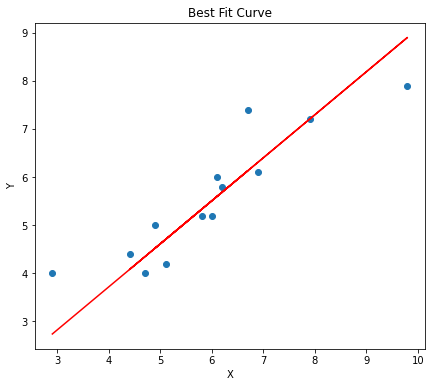

In [16]:
fig, ax = plt.subplots(figsize=(7,6))
plt.plot(x, h, 'r')
ax.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Best Fit Curve")

### Plotting Function

In [17]:
# function for plotting
def graph(x,y):
    fig = plt.subplots(figsize=(7,6))
    plt.plot(x, y, marker='o', c='blue', mfc='red', mec='k')
    plt.ylabel("Cost")
    plt.title("Learning curve of parameter and cost")

Text(0.5, 0, 'Theta(0)')

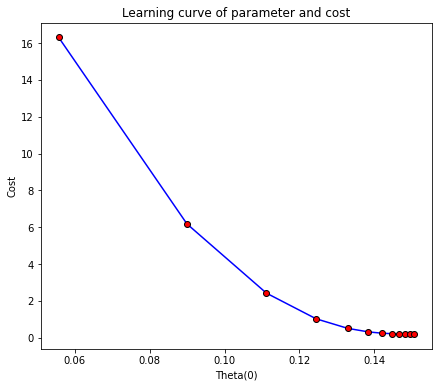

In [18]:
# Plot Theta_0 & Cost
graph(THETA_0, Cost_J)
plt.xlabel("Theta(0)")

Text(0.5, 0, 'Theta(1)')

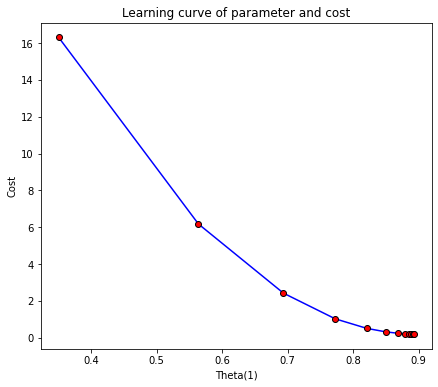

In [19]:
# Plot Theta_0 & Cost
graph(THETA_1, Cost_J)
plt.xlabel("Theta(1)")

Text(0.5, 1.0, 'Loss - Iterations')

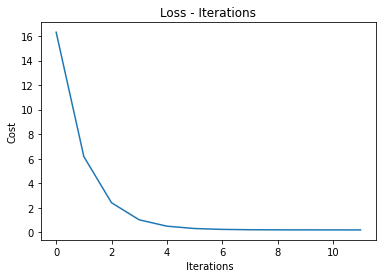

In [20]:
# Plot number of iterations & Cost
plt.plot(Cost_J)
plt.xlabel(" Iterations")
plt.ylabel("Cost")
plt.title("Loss - Iterations")

## R2 score to evaluate LR equation output
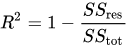
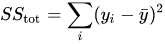
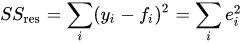
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [21]:
# to Calc. acuuracy
from sklearn.metrics import r2_score
r2_score(y, predict)

0.7473756021508766

# LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [23]:
# read Data
file = "RegData.csv"
Data3 = np.loadtxt(file, delimiter=',')
print(Data3)

[[2.9000001  4.        ]
 [6.69999981 7.4000001 ]
 [4.9000001  5.        ]
 [7.9000001  7.19999981]
 [9.80000019 7.9000001 ]
 [6.9000001  6.0999999 ]
 [6.0999999  6.        ]
 [6.19999981 5.80000019]
 [6.         5.19999981]
 [5.0999999  4.19999981]
 [4.69999981 4.        ]
 [4.4000001  4.4000001 ]
 [5.80000019 5.19999981]]


In [24]:
# extract x , y from data
X_sk = Data3[:,0] .reshape(-1, 1)
Y_sk = Data3[:,1] .reshape(-1, 1)

In [25]:
# Build LR Model
reg = LinearRegression()

#### Train the model (fit the model to the training data)

In [26]:
reg.fit(X_sk, Y_sk)

LinearRegression()

In [27]:
reg.score(X_sk, Y_sk)

0.8213156778363777

#### Predict y values using the trained model

In [28]:
Y_Predict = reg.predict(X_sk)
Y_Predict

array([[3.44824549],
       [6.08745623],
       [4.83730388],
       [6.92089146],
       [8.240497  ],
       [6.22636227],
       [5.67073878],
       [5.74019163],
       [5.60128593],
       [4.97620959],
       [4.69839784],
       [4.49003928],
       [5.46238022]])

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

Text(0.5, 1.0, 'Best fit for scatter data')

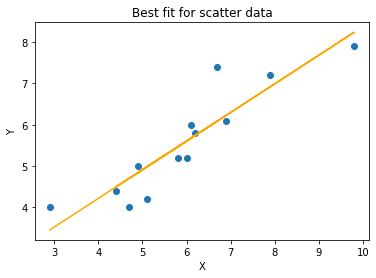

In [29]:
plt.scatter(X_sk, Y_sk)
plt.plot(X_sk, Y_Predict, 'orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Best fit for scatter data")

#### Use R2 score to evaluate model output

In [30]:
# to Calc. acuuracy
from sklearn.metrics import r2_score
r2_score(Y_sk, Y_Predict)

0.8213156778363777